In [1]:
import pandas as pd 
import matplotlib as plt

a3c_test = pd.read_csv('a3c_test20210309-144134.csv')
#a3c_test
a3c_train = pd.read_csv('a3c_train20210309-144134.csv')

ppo_train = pd.read_csv('PPO_train20210311-101629.csv')
ppo_test = pd.read_csv('PPO_test20210311-101629.csv')


<AxesSubplot:title={'center':'A3C Train - Reward By Steps'}, xlabel='Steps'>

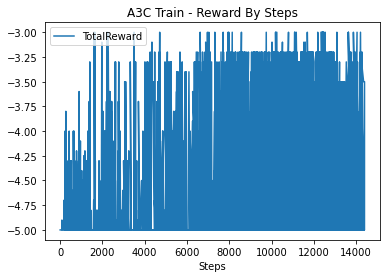

In [2]:
a3c_train.plot(x='Steps',y='TotalReward',title="A3C Train - Reward By Steps")

<AxesSubplot:title={'center':'A3C Test - Reward By Steps'}, xlabel='Steps'>

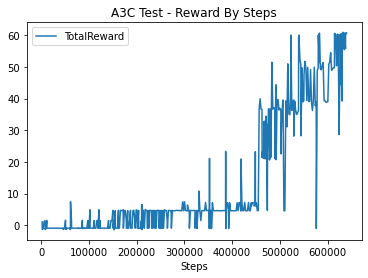

In [3]:

a3c_test.plot(x='Steps',y='TotalReward',title="A3C Test - Reward By Steps")

Text(0, 0.5, 'Reward')

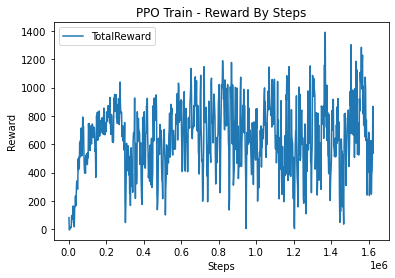

In [18]:
ppo_train_graph = ppo_train.plot(x='Steps',y='TotalReward',title="PPO Train - Reward By Steps")
ppo_train_graph.set_ylabel("Reward")

<AxesSubplot:title={'center':'PPO Test - Reward By Steps'}, xlabel='Steps'>

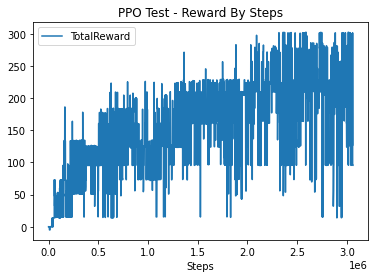

In [5]:
ppo_test.plot(x='Steps',y='TotalReward',title="PPO Test - Reward By Steps")